## **Tugas 6, Komputasi Nuklir**
**Dhiya Salma Salsabila/24923304**

## Soal
1. Buat program difusi neutron untuk 1 grup 1 dimensi

## Jawab

## <center>**Difusi Neutron**</center> 

Persamaan difusi 1 grup
$$ -\vec{\nabla} D \vec{\nabla} \phi +  \sum_{a} \phi = \frac{v \sum_{f}}{K_eff} \phi $$
<br> 1 Dimensi arah x
$$ -\frac{d}{dx} (D \frac{d\phi}{dx}) + \sum_{a} \phi_{(x)} = \frac{v \sum_{f}}{K_eff} \phi_{(x)} $$
<br> Karena 1 dimensi maka diintegralkan ke arah i
$$ -\int_{i}\vec{\nabla}D \vec{\nabla}\phi d^3\vec r + \int_{i} \sum_{a} \phi d^3\vec r= \int_{i} \frac{v \sum_{f}}{K_eff}  \phi d^3\vec r $$
<br> Dengan teorema divergensi
$$ -\int_{i} D \vec{\nabla}\phi \vec{dA} + \sum_{a} \phi^{i} V^{i}= \frac{1}{K_eff} v \sum_{f}\phi^{i} V^{i} $$
<br> Pada suku difusi
$$ -\int_{i+1} D \vec{\nabla}\phi \vec{dA} + \int_{i-1} D \vec{\nabla}\phi \vec{dA} $$
$$ -D^{{i+1}} \frac{\phi^{i+1}-\phi^{i}} {r_{i+1} -r_{i}} A^{i+1}+D^{{i-1}} \frac{\phi^{i} - \phi^{i-1}} {r_{i} -r_{i-1}} A^{i-1} $$
<br> Maka persamaan menjadi
$$ -D^{{i+1}} \frac{\phi^{i+1}-\phi^{i}} {r_{i+1} -r_{i}} A^{i+1}+D^{{i-1}} \frac{\phi^{i} - \phi^{i-1}} {r_{i} -r_{i-1}} A^{i-1} + \sum_{a} \phi^{i} A^{i}= \frac{1}{K_eff} v \sum_{f}\phi^{i} A^{i}$$

Kelompokkan $\phi$
<br> $$ \phi^{i+1} (\frac{-D^{i+1}}{r_{i+1} -r_{i}}) + \phi^{i} (\frac{D^{i+1,j}}{r_{i+1} -r_{i}} + \frac{D^{i-1}}{r_{i} -r_{i-1}} +\sum_{a} \Delta x_i ) + \phi^{i-1} (\frac{-D^{i-1}}{r_{i} -r_{i-1}}) = \frac{1}{K_eff} v \sum_{f}\phi^{i} \Delta x_i$$
 
<br> Misalkan
 $$ \alpha^{i} = \frac{D^{i-1}}{r_{i} -r_{i-1}}......(1)$$
 $$ \beta^{i} = \frac{D^{i+1,j}}{r_{i+1} -r_{i}} + \frac{D^{i-1}}{r_{i} -r_{i-1}} +\sum_{a} \Delta x_i.......(2) $$
 $$ S^{i} = \frac{1}{K_eff} v \sum_{f}\phi^{i} \Delta x_i......(3) $$

Maka persamaan menjadi
$$  -\alpha^{i} \phi^{i-1} + \beta^{i} \phi^{i} - \alpha^{i+1} \phi^{i+1} = S^{i} $$
Bentuk ini dapat disederhanakan kedalam matriks menjadi:
$$
\begin{pmatrix}
  - \alpha     & \beta & -\alpha   & 0  &0    &0\\
  0       & -\alpha   & \beta & -\alpha &0   &0 \\
  0       & 0    & -\alpha   &\ddots  & \vdots  & \vdots \\
  0       & 0    & 0   & \cdots  & \beta & -\alpha  \\
\end{pmatrix}
\begin{pmatrix}
  \phi_{x-\Delta x}\\
  \vdots \\
  \phi_x \\
  \vdots \\
  \phi_{x+\Delta x}\\
\end{pmatrix} 
= S_x
$$
$$ A \phi = S $$

**Algoritma**
1. Tebak semua $\phi$ dan $K_{eff}$
2. Hitung sumber $S^{i}$
3. Menggunakan metode iteratif jacobi
$$ \phi^{i,j} = \frac{S^{i,j}+\alpha^{i-1}\phi+\alpha^{i+1}\phi}{\beta^{i,j}} $$
4. Hitung total fisi
$$ f_{n+1} = \sum_i v \sum_{f} \phi_{n+1}^{i} $$
5. Update nilai $K_{eff}$
$$ K_{eff}^{n+1} = K_{eff}^{n} \frac{F_{n+1}} {F_n} $$
6. Cek konvergensi
$$ \lvert {\frac{K_{eff}^{n+1}-K_{eff}^{n}}{K_{eff}^{n+1}+K_{eff}^{n}}} \rvert < \epsilon $$
7. Bila belum konvergen kembali ke langkah 2

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

# Initial Constants
sig_a = 0.01    # Sigma absorpsi
d = 1           # DIfusi
nu_sigf = 0.1   # Sigma fisi
r  = np.linspace(0, 10, 10) # Panjang
keff_awal = 1
fluks_tebakan = 2200
# Dengan menggunakan persamaan (1) dan (2) untuk menghitung alpha dan beta
alpha = []
beta = []
for i in range(len(r)-1):
    a = -d / (r[i+1]-r[i])
    b = 2 * (d / (r[i+1]-r[i])) + sig_a
    alpha.append(a)
    beta.append(b) 
alpha.append(alpha[-1])
beta.append(beta[-1])
# Membuat matriks fluks dengan nilai tebakkan
phi = np.ones((len(alpha)))
# Dengan menggunakan persamaan (4) dibuat matriks sumber
s = (1/keff_awal)*phi
s = np.array(s)
N = 10
# Membuat matriks A dengan zeros
A = np.zeros((N, N))
# Baris pertama (gamma di atas, alpha di sebelahnya)
A[0, 0] = beta[0]
A[0, 1] = alpha[0]
for i in range(1, len(beta)-1):
    A[i, i] = beta[i]  # Diagonal utama
    A[i, i - 1] = alpha[i]  # Sub-diagonal
    A[i, i + 1] = alpha[i]  # Sub-diagonal
# Baris terakhir
A[-1, -1] = beta[-1]  # Beta di diagonal utama terakhir
A[-1, -2] = alpha[-1]  # Alpha di bawah diagonal utama

# Hitung total fisi awal
fisi_awal = len(A) * fluks_tebakan * nu_sigf

# Inisialisasi fluks dan parameter lainnya
fluks_n = np.zeros_like(s)
fisi = [fisi_awal]
keff = [keff_awal]
all_fluks = []

In [2]:
# Fungsi Jacobi
def jacobi(new_fluks, matriks_A, matriks_sumber, fisi, keff, toleransi, nu_sigf, max_iter=1000):
    iter_count = 0
    while iter_count < max_iter:
        iter_count += 1
        # Hitung nilai fluks baru
        for i in range(matriks_A.shape[0]):
            s1 = np.dot(matriks_A[i, :i], new_fluks[:i])
            s2 = np.dot(matriks_A[i, i + 1:], new_fluks[i + 1:])
            new_fluks[i] = (matriks_sumber[i] - s1 - s2) / matriks_A[i, i]
        # Simpan hasil fluks baru
        all_fluks.append(new_fluks.copy())
        # Hitung fisi baru
        f_i = np.sum(new_fluks) * nu_sigf
        fisi.append(f_i)
        # Hitung keff baru
        keff_i = keff[-1] * (fisi[-1] / fisi[-2])
        keff.append(keff_i)
        # Cek keff
        cek_keff = abs((keff[-2] - keff[-1]) / (keff[-2] + keff[-1]))
        # Cek konvergensi
        if cek_keff <= toleransi:
            break
        # Update sumber dengan nilai fluks baru
        matriks_sumber = (1 / keff[-1]) * new_fluks
    return fisi, keff, all_fluks

# Panggil Fungsi Jacobi
hasil_fisi, hasil_keff, all_fluks = jacobi(fluks_n, A, s, fisi, keff, toleransi=1e-5, nu_sigf=nu_sigf)

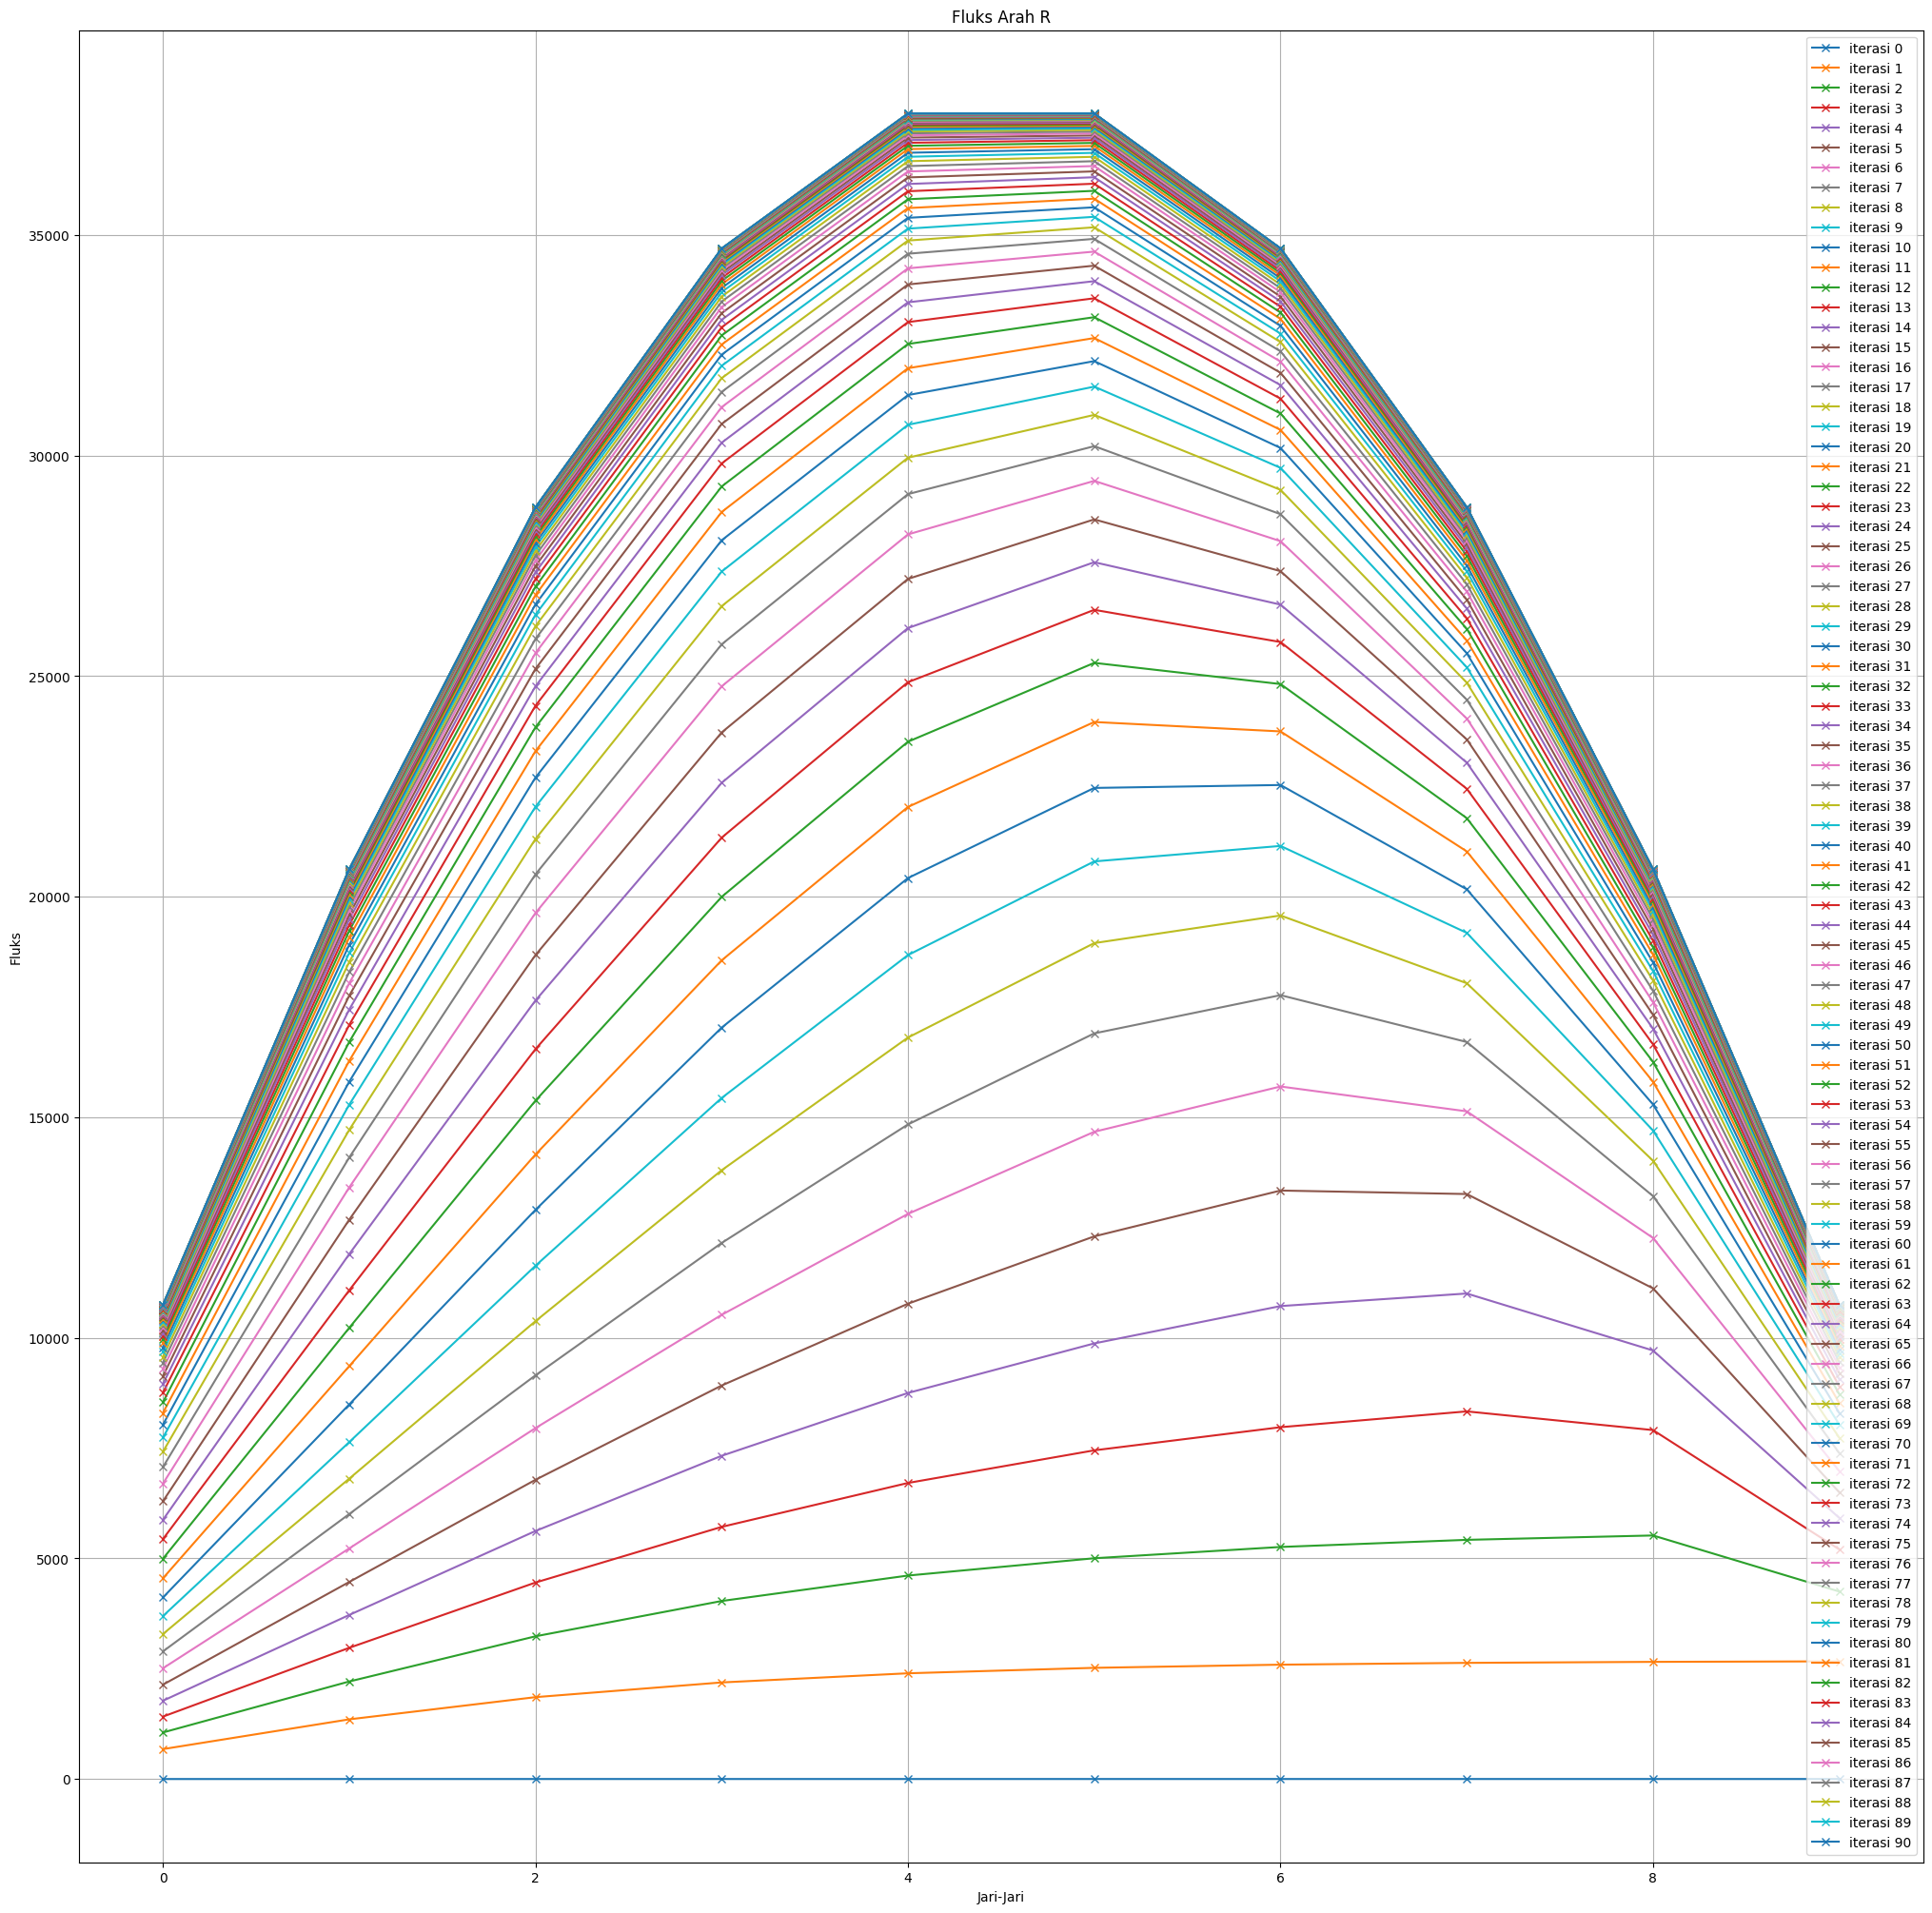

In [4]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(figsize=(25, 25))
# Buat plot r
for i in range(len(all_fluks)):
    ax1.plot(all_fluks[i], label=f'iterasi {i}', linestyle='-', marker='x')

# Tambahin legend di grafik r
ax1.set_title('Fluks Arah R')
ax1.set_xlabel('Jari-Jari')
ax1.set_ylabel('Fluks')
ax1.legend(loc='upper right')
ax1.grid()